<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (5 Marks)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
import pandas as pd

In [3]:
df = pd.read_json('/content/drive/My Drive/Sarcasm Detection NLP/Sarcasm_Headlines_Dataset.json', lines = True)
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


### Drop `article_link` from dataset (5 Marks)

In [4]:
df.drop('article_link', axis = 1, inplace = True)

In [5]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
df['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

### Get length of each headline and add a column for that (5 Marks)

In [7]:
df= df.assign(lengthofHeadline = df['headline'].str.len())
df.head()


,headline,is_sarcastic,lengthofHeadline
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


In [8]:
s = df.loc[0, 'headline']
len(s)

78

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [9]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (5 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [10]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

We do some preprocessing for the headline column 

In [11]:
df['headline'] = df['headline'].apply(lambda x : x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [12]:
import nltk

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stop words
stop = stopwords.words('english')
#df['headline'] = [w for w in df['headline'].str.lower() if w not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df['headline']=df['headline'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [15]:
df['headline'].head()

0    former versace store clerk sues secret black c...
1    roseanne revival catches thorny political mood...
2    mom starting fear sons web series closest thin...
3    boehner wants wife listen come alternative deb...
4    jk rowling wishes snape happy birthday magical...
Name: headline, dtype: object

In [16]:
tokenizer = Tokenizer(num_words= max_features, split =' ' )
tokenizer.fit_on_texts(df['headline'].values)
X = tokenizer.texts_to_sequences(df['headline'].values)

### Pad sequences (5 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [17]:
import numpy as np

In [18]:
X= pad_sequences(X, maxlen=maxlen, dtype='int32', padding='pre', truncating='pre', value=0.0)

In [19]:
y = np.array(df['is_sarcastic'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [20]:
y.shape

(26709,)

### Vocab mapping
- There is no word for 0th index

In [21]:
tokenizer.word_index

{'new': 1,
 'trump': 2,
 'man': 3,
 'us': 4,
 'report': 5,
 'one': 6,
 'area': 7,
 'donald': 8,
 'says': 9,
 'woman': 10,
 'day': 11,
 'time': 12,
 'first': 13,
 'like': 14,
 'get': 15,
 'trumps': 16,
 'people': 17,
 'obama': 18,
 'house': 19,
 'life': 20,
 'make': 21,
 'still': 22,
 'women': 23,
 'white': 24,
 'back': 25,
 'clinton': 26,
 'world': 27,
 'years': 28,
 'could': 29,
 'family': 30,
 'americans': 31,
 'way': 32,
 'black': 33,
 'gop': 34,
 'study': 35,
 '5': 36,
 'bill': 37,
 'would': 38,
 'best': 39,
 'police': 40,
 'watch': 41,
 'really': 42,
 'american': 43,
 'show': 44,
 'school': 45,
 'cant': 46,
 'know': 47,
 'things': 48,
 'good': 49,
 'home': 50,
 'death': 51,
 'president': 52,
 'finds': 53,
 'year': 54,
 'say': 55,
 'video': 56,
 'nation': 57,
 'going': 58,
 'love': 59,
 'health': 60,
 'last': 61,
 'state': 62,
 'hillary': 63,
 'big': 64,
 'parents': 65,
 'may': 66,
 'every': 67,
 'mom': 68,
 'kids': 69,
 'campaign': 70,
 'need': 71,
 'gets': 72,
 'getting': 73,
 'p

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [22]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

28252


In [23]:
X.shape

(26709, 25)

### Load Glove Word Embeddings (5 Marks)

In [24]:
zip_path = '/content/drive/My Drive/Sarcasm Detection NLP/glove.6B.zip'

In [25]:
from zipfile import ZipFile
with ZipFile(zip_path, 'r') as z:
  z.extractall()

### Create embedding matrix

In [26]:
EMBEDDING_FILE = '/content/drive/My Drive/Sarcasm Detection NLP/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [27]:
embedding_matrix.shape

(28252, 200)

In [28]:
embedding_vector.shape

(200,)

### Define model (10 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [29]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.embeddings import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed, LSTM, Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [30]:
import tensorflow

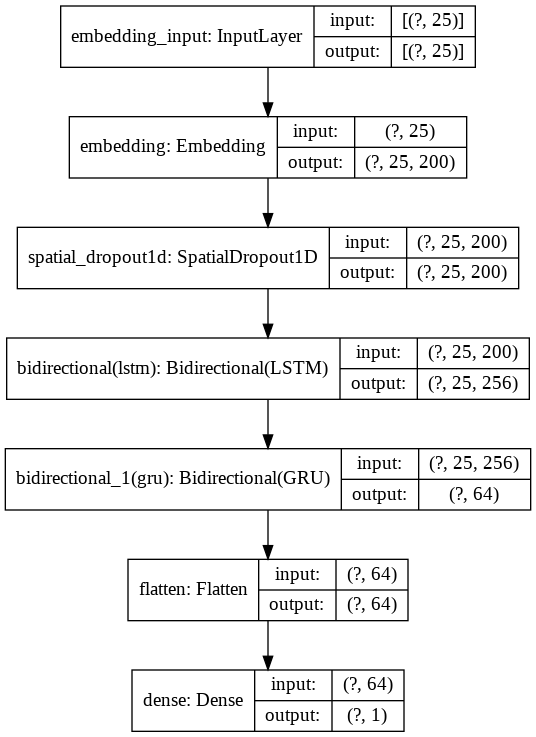

In [31]:
model = Sequential()
model.add(Embedding(num_words, output_dim = 200, weights=[embedding_matrix], input_length= maxlen, trainable = True))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
model.add(Bidirectional(GRU(units = 32, dropout=0.2, recurrent_dropout=0.2)))
model.add(Flatten())
model.add(Dense(1, activation= 'sigmoid'))
tensorflow.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

### Compile the model (5 Marks)

In [32]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 200)           5650400   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 25, 200)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 256)           336896    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                55680     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 6,043,041
Trainable params: 6,043,041
Non-trainable params: 0
______________________________________________

### Fit the model (5 Marks)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X.shape

(26709, 25)

In [36]:
#y = y.reshape(26709, 1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [38]:
model.fit(X_train, y_train, epochs = 6, batch_size=32, verbose = 2, validation_data=(X_test, y_test))

Epoch 1/6
626/626 - 195s - loss: 0.5494 - accuracy: 0.7157 - val_loss: 0.4376 - val_accuracy: 0.7956
Epoch 2/6
626/626 - 195s - loss: 0.4183 - accuracy: 0.8044 - val_loss: 0.3899 - val_accuracy: 0.8224
Epoch 3/6
626/626 - 198s - loss: 0.3376 - accuracy: 0.8517 - val_loss: 0.3801 - val_accuracy: 0.8293
Epoch 4/6
626/626 - 195s - loss: 0.2830 - accuracy: 0.8799 - val_loss: 0.3893 - val_accuracy: 0.8360
Epoch 5/6
626/626 - 194s - loss: 0.2389 - accuracy: 0.9011 - val_loss: 0.4272 - val_accuracy: 0.8348
Epoch 6/6
626/626 - 195s - loss: 0.2018 - accuracy: 0.9150 - val_loss: 0.4402 - val_accuracy: 0.8351


In [39]:
model.evaluate(X_test, y_test, verbose = 1)

209/209 [==============================] - 6s 28ms/step - loss: 0.4402 - accuracy: 0.8351


[0.44021105766296387, 0.8351302742958069]

The test accuracy is between 82% and 84% which is good

In [40]:
p = model.predict_classes(np.array(X_test), verbose=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
209/209 [==============================] - 6s 29ms/step


In [48]:
p[8]

array([1], dtype=int32)

In [47]:
y_test[8]

1

In [49]:
y_test[7]

1

In [50]:
p[7]

array([0], dtype=int32)

We can see that for X_test[8] the prediction is correct i.e statement is a sarcasm but for X_test[7] record prediction is coming wrong

In [51]:
from sklearn.metrics import *

In [52]:
print(classification_report(y_test,model.predict_classes(np.array(X_test))))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3755
           1       0.84      0.77      0.80      2923

    accuracy                           0.84      6678
   macro avg       0.84      0.83      0.83      6678
weighted avg       0.84      0.84      0.83      6678



All the parameters are either 80% or nearby 80% which symbolizes a good model

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


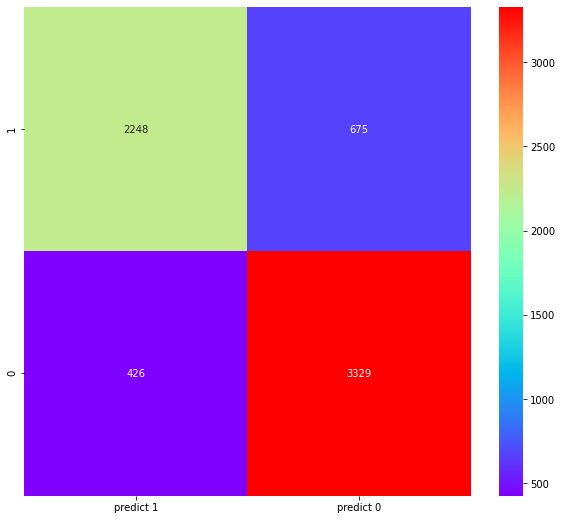

In [55]:
c = confusion_matrix(y_test, model.predict_classes(np.array(X_test)), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g', cmap = 'rainbow')


In confusion matrix we see that True positive and true negative are highest in number